In [3845]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import warnings
warnings.simplefilter('ignore')

In [3846]:
def metric(ytest,ypred):
    return log_loss(ytest,ypred)

In [3847]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Machinehack-Financial-Risk-Prediction\Train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Machinehack-Financial-Risk-Prediction\Test.csv')
sample = pd.read_excel(r'C:\Users\Rahul\Desktop\Machinehack-Financial-Risk-Prediction\Sample_Submission.xlsx')

In [3848]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [3849]:
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


In [3850]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [3851]:
test.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,19.343348,32.591034,7.854077,7.424893,6.957082,5.648069,0.579399
std,14.915933,25.185948,3.176584,3.525117,3.337077,1.708424,0.703382
min,0.000000,5.469000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,6.000000,12.156000,6.000000,5.000000,4.000000,4.000000,0.000000
50%,13.000000,19.968000,7.000000,7.000000,6.000000,6.000000,1.000000
75%,37.000000,62.766000,10.000000,10.000000,8.000000,7.000000,1.000000
max,41.000000,77.668000,15.000000,15.000000,15.000000,10.000000,5.000000


In [3852]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
City                    543 non-null int64
Location_Score          543 non-null float64
Internal_Audit_Score    543 non-null int64
External_Audit_Score    543 non-null int64
Fin_Score               543 non-null int64
Loss_score              543 non-null int64
Past_Results            543 non-null int64
IsUnderRisk             543 non-null int64
dtypes: float64(1), int64(7)
memory usage: 34.0 KB


In [3853]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
City                    233 non-null int64
Location_Score          233 non-null float64
Internal_Audit_Score    233 non-null int64
External_Audit_Score    233 non-null int64
Fin_Score               233 non-null int64
Loss_score              233 non-null int64
Past_Results            233 non-null int64
dtypes: float64(1), int64(6)
memory usage: 12.8 KB


In [3854]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [3855]:
test.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

In [3856]:
train.Past_Results.nunique()

7

In [3857]:
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


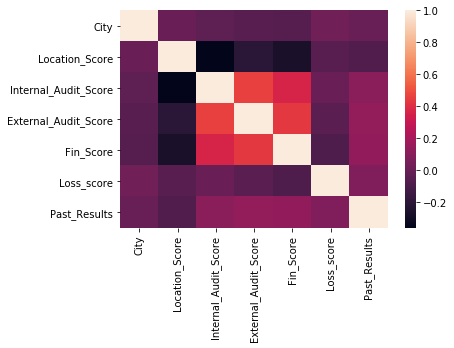

In [3858]:
sns.heatmap(train.drop(columns='IsUnderRisk').corr())

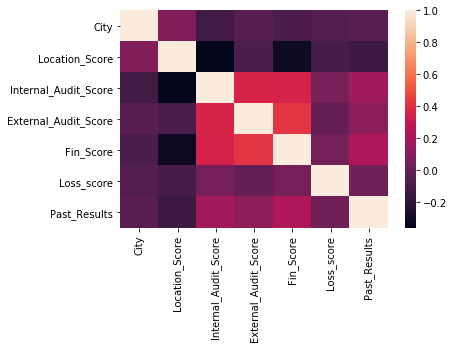

In [3859]:
sns.heatmap(test.corr())

In [3860]:
test.Past_Results.value_counts()

0    114
1    110
2      6
5      2
3      1
Name: Past_Results, dtype: int64

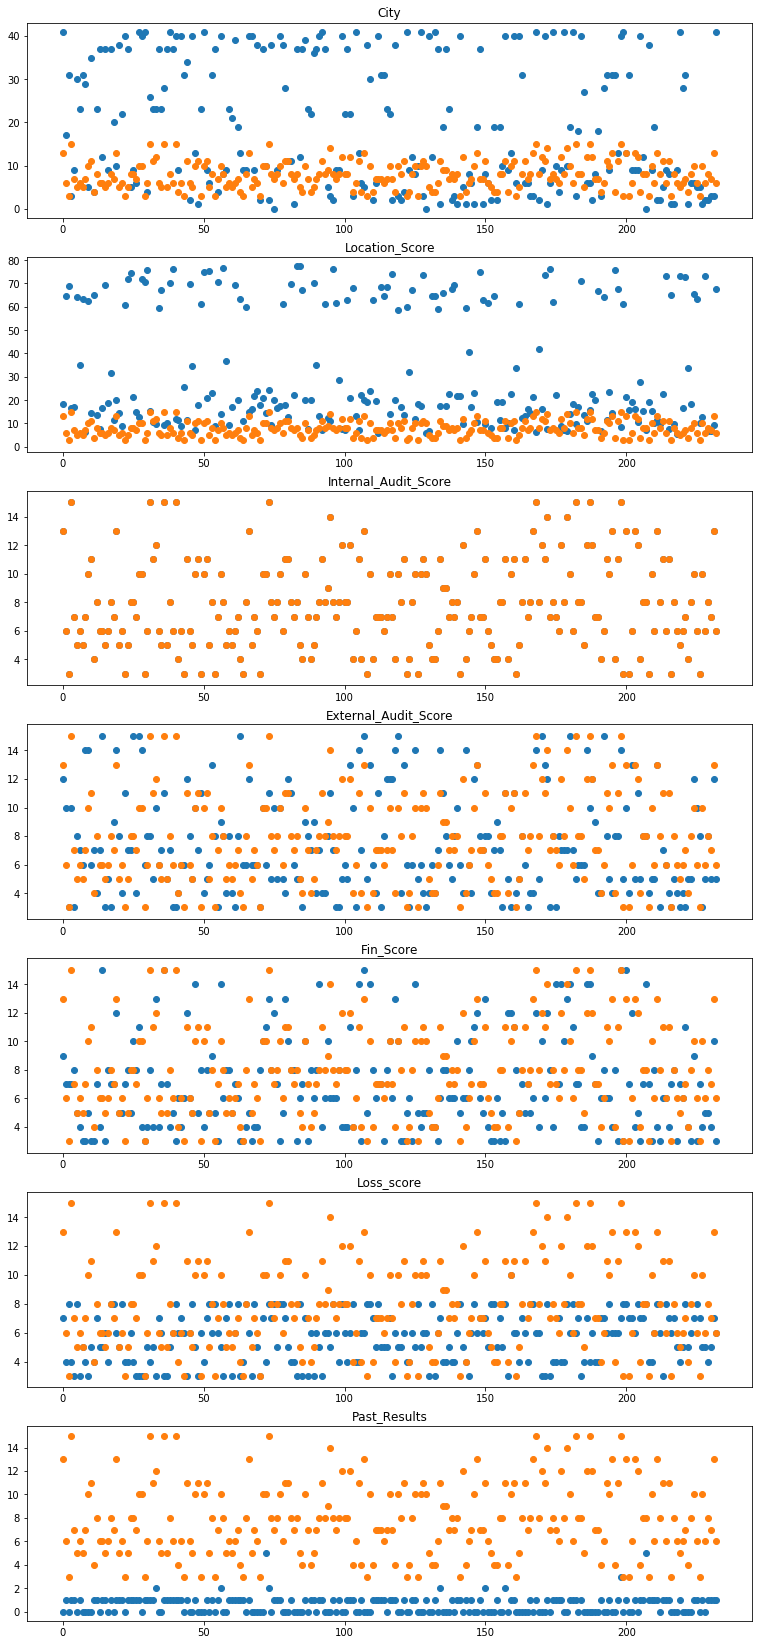

In [3861]:
p = 0
plt.figure(figsize=(13,38))
for i in test.columns:
    plt.subplot(9,1,p+1)
    plt.scatter(range(len(test)),test[i])
    plt.scatter(range(len(test)),test.Internal_Audit_Score)
    plt.title(i)
    p=p+1

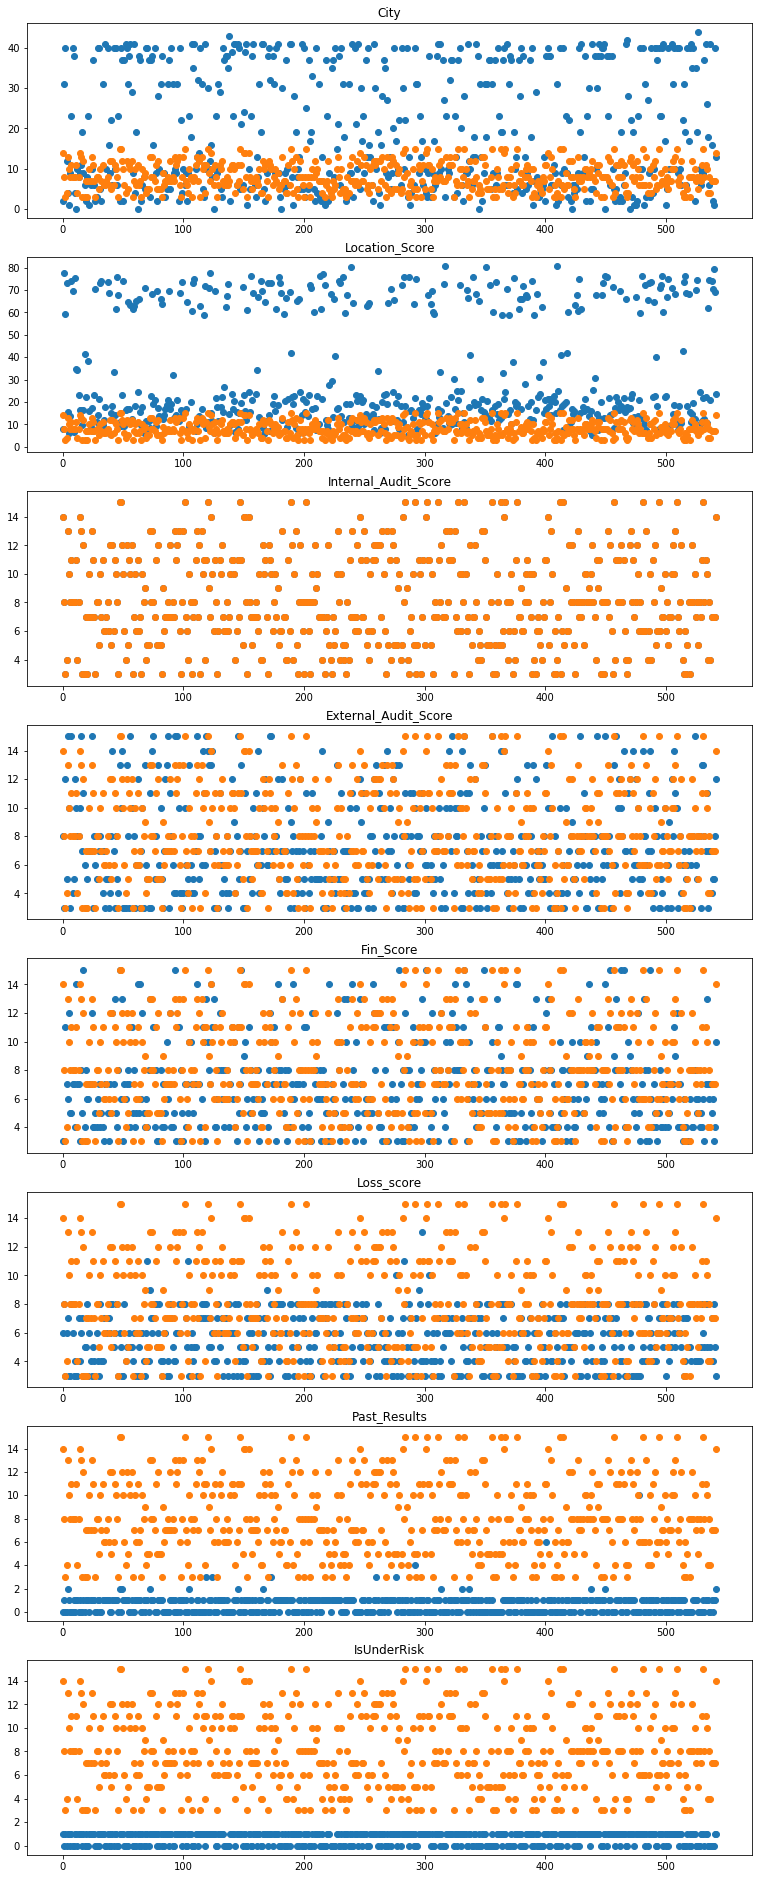

In [3862]:
p = 0
plt.figure(figsize=(13,38))
for i in train.columns:
    plt.subplot(9,1,p+1)
    plt.scatter(range(len(train)),train[i])
    plt.scatter(range(len(train)),train.Internal_Audit_Score)
    plt.title(i)
    p=p+1

In [3863]:
target='IsUnderRisk'

In [3864]:
# No. of elements which are in test but not in train
for col in train.columns.tolist():
    if col != target:
        print("{}----->\t{}".format(col,len(set(test[col].unique())-set(train[col].unique()))))

City----->	2
Location_Score----->	228
Internal_Audit_Score----->	0
External_Audit_Score----->	0
Fin_Score----->	0
Loss_score----->	0
Past_Results----->	1


In [3865]:
#sns.pairplot(train, hue = 'IsUnderRisk')

In [3866]:
train['IsUnderRisk'].value_counts()

1    340
0    203
Name: IsUnderRisk, dtype: int64

In [3867]:
label=train.IsUnderRisk

In [3868]:
train.Location_Score=train.Location_Score.apply(lambda x : (x-np.mean(train.Location_Score)))
test.Location_Score=test.Location_Score.apply(lambda x : (x-np.mean(test.Location_Score)))

In [3869]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,-24.227346,14,8,3,6,0,1
1,31,45.470654,8,3,3,8,1,0
2,40,26.943654,3,12,11,3,0,1
3,12,40.820654,4,5,7,6,0,0
4,4,-16.593346,13,15,6,7,2,1


In [3870]:
test.Loss_score.min()

3

In [3871]:
train.loc[478,'Past_Results'] = 1
train.loc[401,'Past_Results'] = 1

In [3872]:
 train.sort_index(by='City').City.value_counts()

40    55
9     45
6     38
41    36
10    35
2     31
5     27
37    27
38    26
31    25
3     23
23    19
13    18
4     15
19    14
1     14
8     10
0      8
30     7
22     7
17     7
28     6
35     6
18     6
16     6
11     3
12     3
21     3
27     3
29     3
32     3
20     2
39     2
14     1
15     1
43     1
24     1
25     1
26     1
7      1
33     1
42     1
44     1
Name: City, dtype: int64

In [3873]:
#train.Internal_Audit_Score=train.Internal_Audit_Score.apply(lambda x : x/(train.Internal_Audit_Score).nunique())
#test.Internal_Audit_Score=test.Internal_Audit_Score.apply(lambda x : x/(test.Internal_Audit_Score).nunique())

In [3874]:
for i in ['Internal_Audit_Score','External_Audit_Score','Fin_Score','Loss_score']:
    train[i]=train[i].apply(lambda x : (x/(train[i].nunique())))
    test[i]=test[i].apply(lambda x : (x/(test[i].nunique())))

In [3875]:
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,-24.227346,1.076923,0.615385,0.230769,0.6,0,1
1,31,45.470654,0.615385,0.230769,0.230769,0.8,1,0
2,40,26.943654,0.230769,0.923077,0.846154,0.3,0,1
3,12,40.820654,0.307692,0.384615,0.538462,0.6,0,0
4,4,-16.593346,1.000000,1.153846,0.461538,0.7,2,1


In [3876]:
train['Total_mean_Score'] = np.mean(train.loc[:,'Internal_Audit_Score':'Loss_score'],axis=1)
test['Total_mean_Score'] = np.mean(test.loc[:,'Internal_Audit_Score':'Loss_score'],axis=1)

#train['Total_std_Score'] = np.std(train.loc[:,'Internal_Audit_Score':'Loss_score'],axis=1)
#test['Total_std_Score'] = np.std(test.loc[:,'Internal_Audit_Score':'Loss_score'],axis=1)

train['Total_Max_Score'] = np.max(train.loc[:,'Internal_Audit_Score':'Loss_score'],axis=1)
test['Total_Max_Score'] = np.max(test.loc[:,'Internal_Audit_Score':'Loss_score'],axis=1)


train['Total_Min_Score'] = np.min(train.loc[:,'Internal_Audit_Score':'Loss_score'],axis=1)
test['Total_Min_Score'] = np.min(test.loc[:,'Internal_Audit_Score':'Loss_score'],axis=1)


#train['Total_median_Score'] = np.median(train.loc[:,'Internal_Audit_Score':'Loss_score'],axis=1)
#test['Total_median_Score'] = np.median(test.loc[:,'Internal_Audit_Score':'Loss_score'],axis=1)



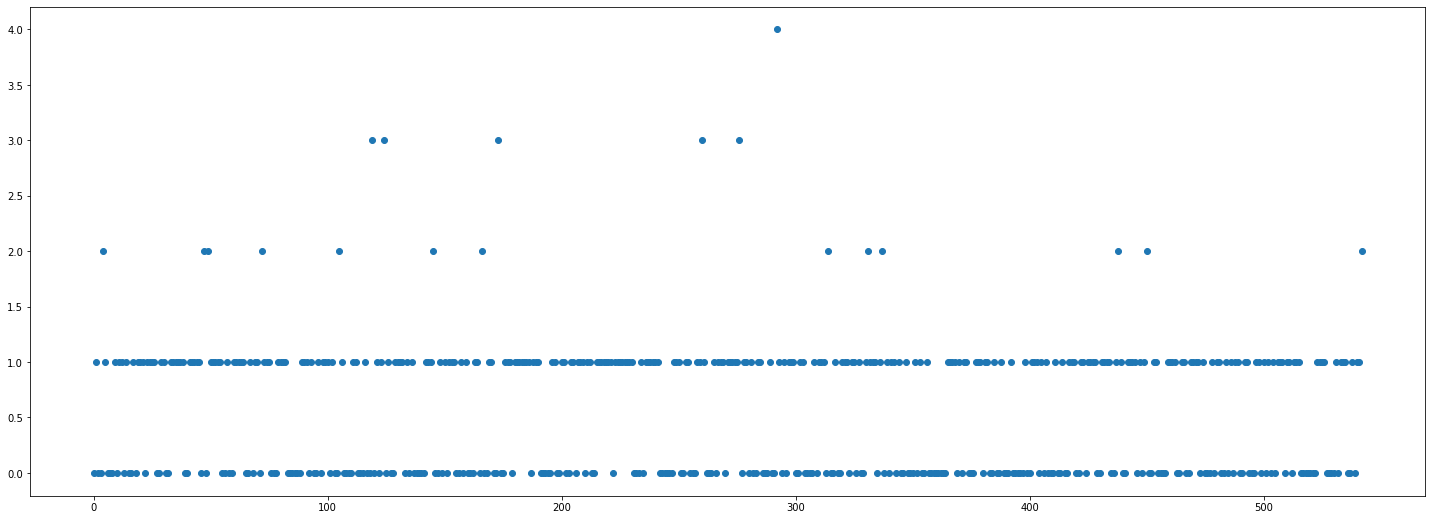

In [3877]:
plt.figure(figsize=(25,9))
plt.scatter(range(len(train)),train.Past_Results)
#plt.scatter(range(len(train)),train.Total_mean_Score)

In [3878]:
train_dummies = pd.get_dummies(pd.DataFrame(train[['Internal_Audit_Score','External_Audit_Score','Fin_Score']].astype('category')))

In [3879]:
test_dummies = pd.get_dummies(pd.DataFrame(test[['Internal_Audit_Score','External_Audit_Score','Fin_Score']].astype('category')))

In [3880]:
train=pd.concat([train,train_dummies],axis = 1)
test=pd.concat([test,test_dummies],axis = 1)

In [3881]:
#smote = SMOTETomek(ratio='auto')
#train1,label1=smote.fit_sample(train,label)
#train = pd.DataFrame(train1,columns=train.columns)
#label = pd.DataFrame(label1)
#label.rename({0:'IsUnderRisk'},axis=1,inplace=True)

In [3882]:
test.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,Total_mean_Score,Total_Max_Score,Total_Min_Score,...,Fin_Score_0.46153846153846156,Fin_Score_0.5384615384615384,Fin_Score_0.6153846153846154,Fin_Score_0.6923076923076923,Fin_Score_0.7692307692307693,Fin_Score_0.8461538461538461,Fin_Score_0.9230769230769231,Fin_Score_1.0,Fin_Score_1.0769230769230769,Fin_Score_1.1538461538461537
0,41,-14.319034,1.000000,0.923077,0.692308,1.000000,0,0.903846,1.000000,0.692308,...,0,0,0,1,0,0,0,0,0,0
1,17,32.207966,0.461538,0.769231,0.538462,0.571429,1,0.585165,0.769231,0.461538,...,0,1,0,0,0,0,0,0,0,0
2,31,36.298966,0.230769,0.230769,0.538462,1.142857,0,0.535714,1.142857,0.230769,...,0,1,0,0,0,0,0,0,0,0
3,3,-16.099034,1.153846,0.769231,0.538462,0.571429,1,0.758242,1.153846,0.538462,...,0,1,0,0,0,0,0,0,0,0
4,9,-15.413034,0.538462,0.230769,0.615385,0.428571,1,0.453297,0.615385,0.230769,...,0,0,1,0,0,0,0,0,0,0


In [3883]:
train.shape

(543, 50)

In [3884]:
mm = StandardScaler()
train[['Location_Score']]=pd.DataFrame(mm.fit_transform(train[['Location_Score']]))
test[['Location_Score']]=pd.DataFrame(mm.fit_transform(test[['Location_Score']]))

In [3885]:
test.shape

(233, 49)

In [3840]:
train.drop(columns=['City'],inplace=True)
test.drop(columns=['City'],inplace=True)

In [3844]:
train.head()

,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,Total_mean_Score,Total_Max_Score,Total_Min_Score,...,Fin_Score_0.46153846153846156,Fin_Score_0.5384615384615384,Fin_Score_0.6153846153846154,Fin_Score_0.6923076923076923,Fin_Score_0.7692307692307693,Fin_Score_0.8461538461538461,Fin_Score_0.9230769230769231,Fin_Score_1.0,Fin_Score_1.0769230769230769,Fin_Score_1.1538461538461537
0,-24.227346,1.076923,0.615385,0.230769,0.6,0,1,0.630769,1.076923,0.230769,...,0,0,0,0,0,0,0,0,0,0
1,45.470654,0.615385,0.230769,0.230769,0.8,1,0,0.469231,0.800000,0.230769,...,0,0,0,0,0,0,0,0,0,0
2,26.943654,0.230769,0.923077,0.846154,0.3,0,1,0.575000,0.923077,0.230769,...,0,0,0,0,0,1,0,0,0,0
3,40.820654,0.307692,0.384615,0.538462,0.6,0,0,0.457692,0.600000,0.307692,...,0,1,0,0,0,0,0,0,0,0
4,-16.593346,1.000000,1.153846,0.461538,0.7,2,1,0.828846,1.153846,0.461538,...,1,0,0,0,0,0,0,0,0,0


In [3843]:
train.shape

(543, 49)

In [3886]:
res = pd.DataFrame()

Training Loss in fold 1:	0.2888050163113043		Val Loss in fold 1:	0.368926993299037
Training Loss in fold 2:	0.2854634150846491		Val Loss in fold 2:	0.4241107981162388
Training Loss in fold 3:	0.296116106767232		Val Loss in fold 3:	0.3079059272067021
Training Loss in fold 4:	0.29608480328396275		Val Loss in fold 4:	0.29860536833954965
Training Loss in fold 5:	0.3012895246645906		Val Loss in fold 5:	0.22048246345850878
Training Loss in fold 6:	0.29685817071826937		Val Loss in fold 6:	0.2880997387176716
Training Loss in fold 7:	0.2931866577627676		Val Loss in fold 7:	0.3250710690661932
Training Loss in fold 8:	0.2960744364097909		Val Loss in fold 8:	0.29410514267345295
Training Loss in fold 9:	0.30049806929599315		Val Loss in fold 9:	0.21797183940103299
Training Loss in fold 10:	0.2960487683105285		Val Loss in fold 10:	0.2942861280863928
Training Loss in fold 11:	0.2909580532292485		Val Loss in fold 11:	0.3588433216439634
Training Loss in fold 12:	0.2939455292566991		Val Loss in fold 12:	

Training Loss in fold 2:	0.08763927746309137		Val Loss in fold 2:	0.3376955638988201
Training Loss in fold 3:	0.09696615253645086		Val Loss in fold 3:	0.35290402409746885
Training Loss in fold 4:	0.08595386741843823		Val Loss in fold 4:	0.3386212473274123
Training Loss in fold 5:	0.09300186417834379		Val Loss in fold 5:	1.1972631813542105
Training Loss in fold 6:	0.08757338558304432		Val Loss in fold 6:	0.22240657723416815
Training Loss in fold 7:	0.09079251793656824		Val Loss in fold 7:	0.39998876170101105
Training Loss in fold 8:	0.09436199375063335		Val Loss in fold 8:	0.3339942139989174
Training Loss in fold 9:	0.09381870472739184		Val Loss in fold 9:	0.19550639020602456
Training Loss in fold 10:	0.0878670675002981		Val Loss in fold 10:	2.09944756037431
Training Loss in fold 11:	0.08785684904223272		Val Loss in fold 11:	0.3472973342751533
Training Loss in fold 12:	0.09114108641520649		Val Loss in fold 12:	1.2655006199789627
Training Loss in fold 13:	0.08358266601112871		Val Loss in

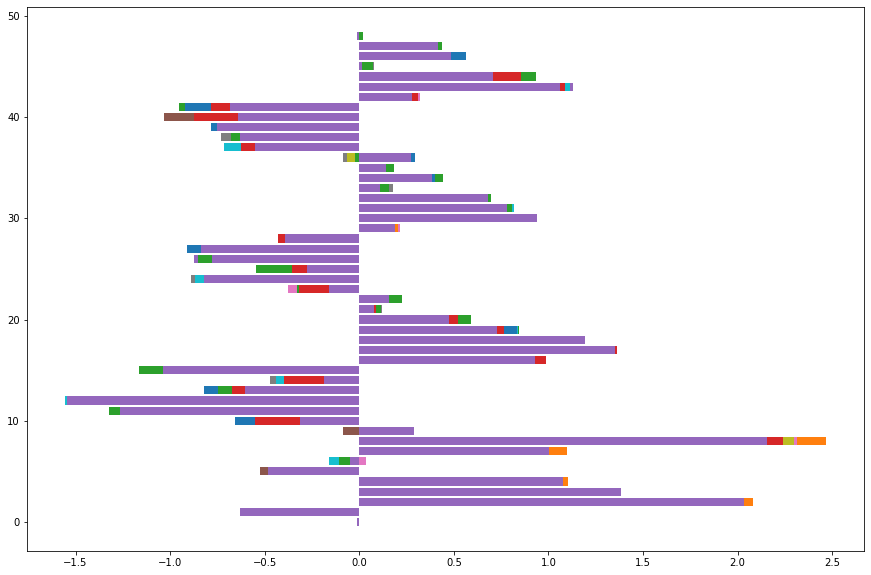

In [3887]:
model = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), BaggingClassifier()]
predicted = []
skf = StratifiedKFold(n_splits=15, shuffle=True, random_state=590006)
skf.get_n_splits(train.drop(columns=['IsUnderRisk']),label)
plt.figure(figsize=(15,10))
for i in model:
    mod = i
    a = list()
    b = list()
    for i,(train_index,test_index) in enumerate(skf.split(train.drop(columns=['IsUnderRisk']),label)):
        x1_train,x1_test = train.drop(columns=['IsUnderRisk']).iloc[train_index],train.drop(columns=['IsUnderRisk']).iloc[test_index]
        y1_train,y1_test = label.iloc[train_index],label.iloc[test_index]
        
        mod.fit(x1_train,y1_train)
        pred_train = mod.predict_proba(x1_train)
        pred_test = mod.predict_proba(x1_test)
        
        a.append(metric(pd.get_dummies(y1_train),pred_train))
        b.append(metric(pd.get_dummies(y1_test), pred_test))
        
        if str(mod)==str(LogisticRegression()):
            predicted.append(pd.DataFrame((mod.predict_proba(test))))
            
            plt.barh([x for x in range(len(mod.coef_[0]))],mod.coef_[0])
        
        print(f'Training Loss in fold {i+1}:\t{metric(pd.get_dummies(y1_train),pred_train)}\t\tVal Loss in fold {i+1}:\t{metric(pd.get_dummies(y1_test),pred_test)}')
    print(str(mod).split('(')[0],'  Training Loss : ',np.mean(a),'     Testing Loss : ',np.mean(b), '\n')
        
    

In [3888]:
for i in predicted:
    res=pd.concat([res,i],axis=1)

In [3889]:
res['0']=np.mean(res[0],axis=1)
res['1']=np.mean(res[1],axis=1)
res.drop(columns=[0,1],inplace=True)
res.rename({'0':0,'1':1},axis=1,inplace=True)

In [3890]:
res.head()

,0,1
0,0.002591,0.997409
1,0.296110,0.703890
2,0.663528,0.336472
3,0.004762,0.995238
4,0.398452,0.601548


In [3891]:
len(res)

233

In [3892]:
res.to_excel('Result.xlsx',index=False)

In [2365]:
res

,0,1
0,0.000130,0.999870
1,0.314540,0.685460
2,0.892041,0.107959
3,0.000209,0.999791
4,0.515355,0.484645
5,0.912627,0.087373
6,0.868755,0.131245
7,0.972697,0.027303
8,0.000472,0.999528
9,0.000396,0.999604
